<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ 3. <b>Классификация текстовых данных и </b> <span style="font-weight:bold; color:green">scikit-learn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<p>Подключение стилей оформления</p>

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
surname = "Корнеева" #Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 3 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


<div class="msg-block msg-warning">
  <p class="msg-text-warn">Варианты могут не совпадать с последующими ДЗ</p>
</div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<div class="msg-block msg-imp">
  <div class="msg-text-imp">
      <p>СРОК СДАЧИ: до <b>11 мая 2017</b></p>
      <p style="margin:0px">ПОСЛЕ СРОКА: первая неделя <b>-25%</b>, вторая неделя и далее до конца модуля <b>-50%</b>
      </p>
  </div>
</div>

<p><b>Варианты</b></p>

<ol>
    <li>
        Набор электронных сообщений (emails) - <b>спам/не спам</b> - <a href="http://csmining.org/index.php/spam-email-datasets-.html">источник</a> - файл c данными: <b>data/emails.tsv</b>
    </li>
    <li>
        Набор SMS сообщений (sms) - <b>спам/не спам</b> - <a href="https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection">источник</a> - файл c данными: <b>data/SMSSpamCollection</b>
    </li>
    <li>Набор рецензий на фильмы (reviews) - <b>positive/negative</b> - <a href="http://www.cs.cornell.edu/people/pabo/movie-review-data/">источник</a> - файл c данными: <b>data/reviews.tsv</b></li>
</ol>

<p><b>Задача 1.</b> Классификация текстовых сообщений <b><i>(2 балла)</i></b></p>

<ol>
    <li>Загрузите исходные данные</li>
    <li>Разбейте загруженные данные на обучающее (train) и тестовое подможества (test)</li>
    <li>Переведите текстовые данные в векторный вид. Для этого воcпользуйтесь средствами sklearn для конвертации текста в векторы TF-IDF (настроить на обучающем подмножестве, n-gram=1, слова в нижний регистр)</li>
    <li>Постройте на обучающем подмножестве следующие модели классификации:
        <ul>
            <li>K-ближайших соседей ($n=5$)</li>
            <li>Логистическая регрессия ($C=1$)</li>
            <li>Мультиномиальный наивный Байес ($\alpha=1$)</li> 
        </ul>
    </li>
    <li>Определите качество классификации (по доле правильных классификаций) на тестовом подмножестве</li>
    <li>Определите с помощью timeit время обучения и предсказания (на тестовом подмножестве) </li>
</ol>

In [3]:
random_state = 123 # для всех объектов/методов/моделей

In [4]:
# Параметры логистической регрессии
#penalty="l2", fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345

# Ваш код
import pandas as pd
from sklearn.model_selection import train_test_split
sms = pd.read_csv("data/SMSSpamCollection", delimiter="\t", names=["spam", "text"]).dropna()

X, y = sms.text, sms.spam
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [6]:
def train_and_predict(model):
    model.fit(X_train_vec, y_train)
    prediction = model.predict(X_test_vec)
    return prediction

In [7]:
import timeit

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

print("KNN model")
model = KNN(5)

start_time = timeit.default_timer()
prediction = train_and_predict(model)
print("Time: ", timeit.default_timer() - start_time)

knn_accuracy = accuracy_score(y_test, prediction)
print("Accuracy score: ", knn_accuracy)

KNN model
Time:  0.34457775787450373
Accuracy score:  0.907394113424


In [8]:
from sklearn.linear_model import LogisticRegression as LogReg

print("Logistic regression model")

model = LogReg(penalty="l2", fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345)

start_time = timeit.default_timer()
prediction = train_and_predict(model)
print("Time: ", timeit.default_timer() - start_time)

logreg_accuracy = accuracy_score(y_test, prediction)
print("Accuracy score:", logreg_accuracy)

Logistic regression model
Time:  0.191122530028224
Accuracy score: 0.971284996411


In [9]:
from sklearn.naive_bayes import MultinomialNB

print("Naive bayes model")

model = MultinomialNB(alpha=1)

start_time = timeit.default_timer()
prediction = train_and_predict(model)
print("Time: ", timeit.default_timer() - start_time)

bayes_accuracy = accuracy_score(y_test, prediction)
print("Accuracy score: ", bayes_accuracy)

Naive bayes model
Time:  0.02971503511071205
Accuracy score:  0.955491744436


<p><b>Задача 2.</b> Применение k-folds <b><i>(3 балла)</i></b></p>

<p>Повторите решение задачи 1, но с ипользованием k-folds (k=4) для разделения исходных данных, обучения и тестирования.</p>

In [10]:
random_state = 123 # для всех объектов/методов/моделей

In [11]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=4)

vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

models = [
    ("knn", KNN(5)),
    ("logreg", LogReg(penalty="l2", fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345)),
    ("bayes", MultinomialNB(alpha=1))
]

accuracies = {
    "knn" : [], 
    "logreg" : [], 
    "bayes": []
}

for train_ind, test_ind in kf.split(X_vec):
    X_train, y_train = X_vec[train_ind], y[train_ind]
    X_test, y_test = X_vec[test_ind], y[test_ind]
    for name, model in models:
        model.fit(X_train, y_train)
        accuracies[name].append(accuracy_score(y_test, model.predict(X_test)))

for name, _ in models:
    print(name, ":", np.mean(accuracies[name]))

knn : 0.918700646088
logreg : 0.959978463747
bayes : 0.957106963388


<p><b>Задача 3.</b> Выбор модели <b><i>(5 баллов)</i></b></p>

<p style="padding-left:15px;">1. Используя данные из задачи 1, разбейте обучающее подмножество (train) с использованием k-folds (k=4) <br>
2. Обучите и протестируйте на разбитом обучающем подмножестве классификаторы со следующими параметрами: </p>

<p>K-ближайших соседей</p>

In [12]:
import numpy as np
ns = np.arange(1, 150, 20) # количество соседей

<p>Логистическая регрессия</p>

In [13]:
cs = np.logspace(-2, 10, 8, base=10) # параметр регуляризации

<p>Мультиномиальный наивный Байес</p>

In [14]:
alphas = np.logspace(-4, 1, 8, base=10) # сглаживающий параметр

<p style="padding-left:15px;">3. Постройте графики (параметры модели)-(доля правильных классификаций) при обучении и валидации <br>
4. Выберите лучшую модель для каждого метода, используя значение качества классификации (использовать долю правильных классификаций)<br>
5. Выбранные модели обучите на обучающем подмножестве (train) и протестируйте на тестовом (test). Определите время обучения и предсказания (см. задачу 1 п. 6)<br>
6. Повторите шаги 2-4 для n-gram=2<br>
7. Выведите итоговые данные по всем методам для лучших моделей (метод, n-gram, значение параметра модели, время обучения, время предсказания, доля правильных классификаций)<br>
8. Сделайте выводы по полученным результатам (преимущества и недостатки методов)
</p>

In [15]:
random_state = 123 # для всех объектов/методов/моделей

In [16]:
# Ваш код
from matplotlib import pyplot as plt
import timeit

def analyze(n_gram=1):
    vectorizer = TfidfVectorizer(lowercase=True, use_idf=True, ngram_range=[n_gram, n_gram])
    X_vec = vectorizer.fit_transform(X)
    
    def train_model (model):
        scores, train_time, prediction_time = [], [], []
        
        for train_ind, test_ind in kf.split(X_vec):
            X_train, y_train = X_vec[train_ind], y[train_ind]
            X_test, y_test = X_vec[test_ind], y[test_ind]
            
            start_time = timeit.default_timer()
            model.fit(X_train, y_train)
            train_time.append(timeit.default_timer() - start_time)
            
            start_time = timeit.default_timer()
            prediction = model.predict(X_test)
            prediction_time.append(timeit.default_timer() - start_time)
            
            scores.append(accuracy_score(y_test, prediction))
        return scores, train_time, prediction_time
    
    
    scores_knn, train_times_knn, prediction_times_knn = [], [], []
    for n in ns:
        model = KNN(n)
        
        scores, train_time, prediction_time = train_model(model)
            
        scores_knn.append(np.mean(scores))
        train_times_knn.append(np.mean(train_time))
        prediction_times_knn.append(np.mean(prediction_time))

    
    scores_logreg, train_times_logreg, prediction_times_logreg = [], [], []
    for c in cs:
        model = LogReg(penalty="l2", fit_intercept=True, \
                max_iter=100, C=c, solver="lbfgs", random_state=12345)
        
        scores, train_time, prediction_time = train_model(model)
        
        scores_logreg.append(np.mean(scores))
        train_times_logreg.append(np.mean(train_time))
        prediction_times_logreg.append(np.mean(prediction_time))

    
    scores_bayes, train_times_bayes, prediction_times_bayes = [], [], []
    for alpha in alphas:
        model = MultinomialNB(alpha=alpha)
        
        scores, train_time, prediction_time = train_model(model)
        
        scores_bayes.append(np.mean(scores))
        train_times_bayes.append(np.mean(train_time))
        prediction_times_bayes.append(np.mean(prediction_time))
       
    
    plt.plot(scores_knn)
    plt.title("KNN Accuracy n_gram = " + str(n_gram))
    plt.grid(True)
    plt.show()
    plt.plot(scores_logreg)
    plt.title("Logreg Accuracy n_gram = " + str(n_gram))
    plt.grid(True)
    plt.show()
    plt.plot(scores_bayes)
    plt.title("Bayes Accuracy n_gram = " + str(n_gram))
    plt.grid(True)
    plt.show()
    
    ind_knn = scores_knn.index(max(scores_knn))
    ind_logreg = scores_logreg.index(max(scores_logreg))
    ind_bayes = scores_bayes.index(max(scores_bayes))
    
    knn_best = ns[ind_knn]
    logreg_best = cs[ind_logreg]
    bayes_best = alphas[ind_bayes]
    
    return (knn_best, logreg_best, bayes_best), [max(i) for i in (scores_knn, scores_logreg, scores_bayes)], \
                [train_times_knn[ind_knn], train_times_logreg[ind_logreg], train_times_bayes[ind_bayes]], \
                [prediction_times_knn[ind_knn], prediction_times_logreg[ind_logreg], prediction_times_bayes[ind_bayes]]
        

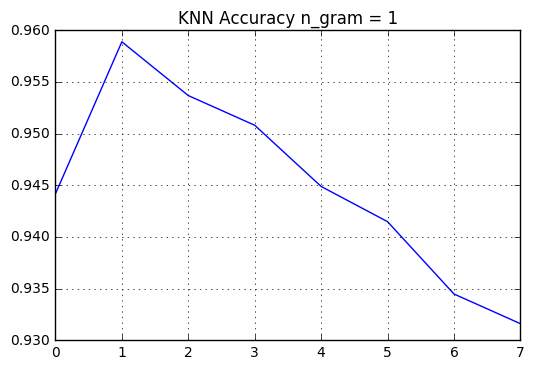

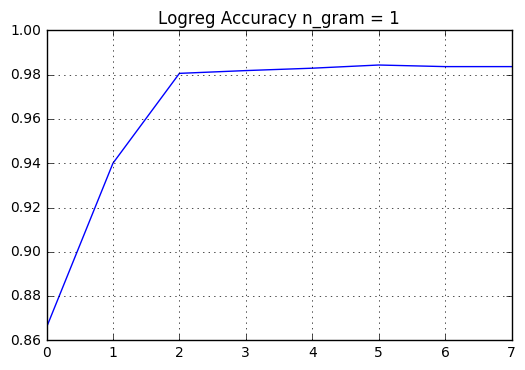

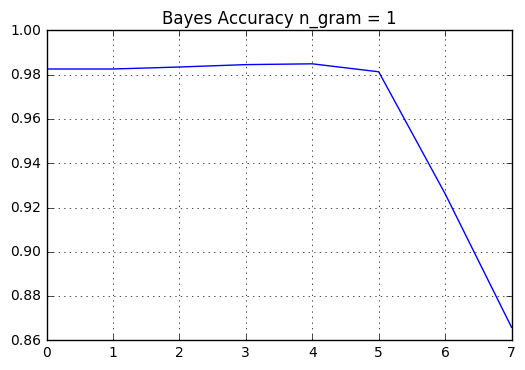

In [17]:
params, accuracies, train_times, prediction_times = analyze(n_gram=1)
bests1 = zip(("N", "C", "alpha"), params, ("knn", "logreg", "bayes"), accuracies, train_times, prediction_times)

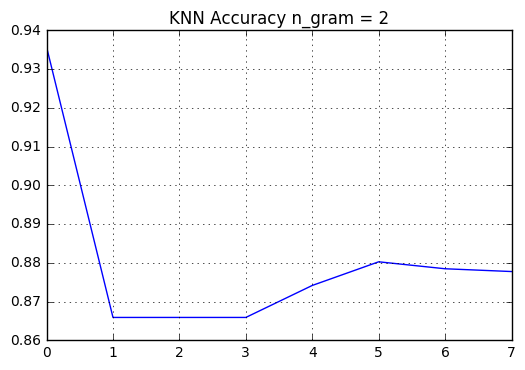

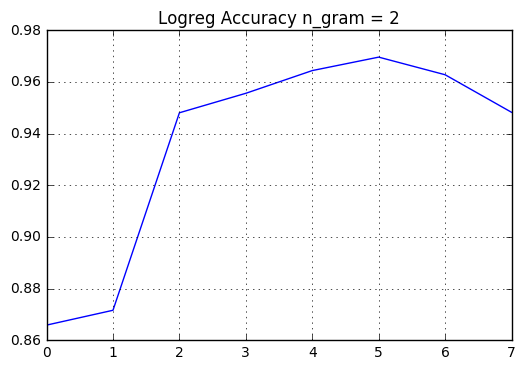

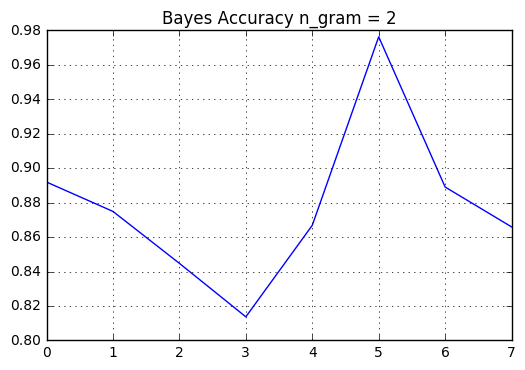

In [18]:
params, accuracies, train_times, prediction_times = analyze(n_gram=2)
bests2 = zip(("N", "C", "alpha"), params, ("knn", "logreg", "bayes"), accuracies, train_times, prediction_times)

In [19]:
for param_name, param, name, score, train_time, prediction_time in bests1:
    print("""{} : {}={}, n_gram={}: 
          accuracy {:.2%}
          train time {:.2}
          prediction time {:.2}""".format(name, param_name, param, 1, score, train_time, prediction_time))

knn : N=21, n_gram=1: 
          accuracy 95.89%
          train time 0.0036
          prediction time 0.21
logreg : C=3727593.720314938, n_gram=1: 
          accuracy 98.44%
          train time 0.091
          prediction time 0.00018
bayes : alpha=0.07196856730011521, n_gram=1: 
          accuracy 98.49%
          train time 0.012
          prediction time 0.00033


In [20]:
for param_name, param, name, score, train_time, prediction_time in bests2:
    print("""{} : {}={}, n_gram={}: 
          accuracy {:.2%}
          train time {:.2}
          prediction time {:.2}""".format(name, param_name, param, 2, score, train_time, prediction_time))

knn : N=1, n_gram=2: 
          accuracy 93.58%
          train time 0.0037
          prediction time 0.085
logreg : C=3727593.720314938, n_gram=2: 
          accuracy 96.97%
          train time 0.47
          prediction time 0.00029
bayes : alpha=0.3727593720314942, n_gram=2: 
          accuracy 97.63%
          train time 0.012
          prediction time 0.00082


<p><b>Задача 4. (опционально)</b> Исследование влияния количества признаков FeatureHasher на качество классификации <b><i>(5 баллов к сумме по всем ДЗ)</i></b></p>

<p>Как будет меняться качество классификации для обозначенных ранее методов при использовании FeatureHasher (или HashingVectorizer) из пакета sklearn перед TF-IDF преобразованием, если</p>

In [21]:
n_features = np.logspace(1, 5, 5, base=10) # количество признаков
non_negative=True

<p>Можно воспользоваться GridSearchCV</p>